In [22]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz
  Stored in directory: /Users/muralijajula/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

### since the output variable target-is churn or no churn TRIAL AND ERROR between logistic regression ,SVM ,Randomforest

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score

In [3]:
df= pd.read_csv('Churn3_AFTERSCALE.csv')
df.shape

(4617, 20)

In [5]:
X = df.drop('y_Churn',axis=1)

In [6]:
X.head()

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage
0,1,0,0,1,0.690901,-0.433885,0.500261,45.07,1.568293,-0.059527,16.78,-0.059921,2.70,-0.101301,-0.583487,-0.448712,11.01,0.872135,1.261885
1,1,0,0,1,0.160503,-0.433885,1.154156,27.47,-0.349166,0.142298,16.62,-0.097506,3.70,1.240707,-0.583487,0.153308,11.45,1.064069,1.335463
2,1,0,0,0,0.918214,-1.199068,0.701460,41.38,1.166275,0.495492,10.30,-1.567294,3.29,0.696649,0.230398,0.203477,7.32,-0.752381,-0.577587
3,0,1,0,0,-0.420409,0.331298,-1.461423,50.90,2.203741,-0.614545,5.26,-2.740354,1.78,-1.334498,1.044284,-0.549048,8.86,-0.073686,-0.577587
4,1,1,0,0,-0.647723,1.096480,0.651160,28.34,-0.254682,1.100966,12.61,-1.031207,2.73,-0.065031,-0.583487,1.056338,8.41,-0.271556,-0.577587


In [7]:
y=df.y_Churn

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)

(3231, 19)
(1386, 19)


In [45]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2771, 1: 460})
Counter({0: 1190, 1: 196})


In [ ]:
#### SMOTING REQUIRED -since the ratio of churners and non-churners is not equal

In [46]:
sm = SMOTE()

In [47]:
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [48]:
# now the chuners and non chuners ratio is same in the output
print(Counter(y_train_sm))
print(Counter(y_test))


Counter({0: 2771, 1: 2771})
Counter({0: 1190, 1: 196})


## Logistic Regression

In [49]:
clf=LogisticRegression()
clf.fit(X_train_sm,y_train_sm)

/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred=clf.predict(X_test)

In [ ]:
#checking accuracy score 

In [51]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [52]:
recall_score(y_test,y_pred)

0.8061224489795918

In [53]:
precision_score(y_test,y_pred)

0.3511111111111111

In [54]:
confusion_matrix(y_test,y_pred)

array([[898, 292],
       [ 38, 158]])

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      1190
           1       0.35      0.81      0.49       196

   micro avg       0.76      0.76      0.76      1386
   macro avg       0.66      0.78      0.67      1386
weighted avg       0.87      0.76      0.79      1386



### For the LR though the recall is 79% the precision score is very less 

## Support vector Machine

In [56]:
svc= SVC()

In [57]:
svc.fit(X_train_sm,y_train_sm)

/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
y_pred_svc= svc.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred_svc)

0.898989898989899

In [60]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1190
           1       0.67      0.57      0.61       196

   micro avg       0.90      0.90      0.90      1386
   macro avg       0.80      0.76      0.78      1386
weighted avg       0.89      0.90      0.90      1386



In [61]:
confusion_matrix(y_test,y_pred_svc)

array([[1135,   55],
       [  85,  111]])

### Random forest 

In [62]:
model = RandomForestClassifier(random_state=42)

In [63]:
model.fit(X_train_sm,y_train_sm)

/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
y_pred_rf= model.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1190
           1       0.87      0.77      0.82       196

   micro avg       0.95      0.95      0.95      1386
   macro avg       0.92      0.88      0.89      1386
weighted avg       0.95      0.95      0.95      1386



In [66]:
accuracy_score(y_test,y_pred_rf)

0.950937950937951

In [67]:
confusion_matrix(y_test,y_pred_rf)

array([[1167,   23],
       [  45,  151]])

### Random forest gives best results for all the metrics as compared to LR and SVM

In [72]:
print("The recall is: {}".format(recall_score(y_test,y_pred_rf).round(3)*100))
print("The Precision is: {}".format(precision_score(y_test,y_pred_rf).round(3)*100))
print("The Accuracy is: {}".format(accuracy_score(y_test,y_pred_rf).round(3)*100))

The recall is: 77.0
The Precision is: 86.8
The Accuracy is: 95.1


# Selection / Shortlisting of ML models
## K fold Cross validation will be used for model selection

In [73]:
# Import All classifcation Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold
import numpy as np

In [75]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BB', BernoulliNB()))
models.append(('XGB_gbtree', XGBClassifier(booster='gbtree')))
models.append(('XGB_gblinear', XGBClassifier(booster='gblinear')))
models.append(('XGB_dart', XGBClassifier(booster='dart')))
models.append(('SVM', SVC()))
models.append(('ANN', MLPClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [76]:
# evaluate each model in turn with X_train_sm,y_train_sm 
seed = 10
results = []
names = []
output = []
score = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model,np.array(X_train_sm),np.array(y_train_sm),cv=kfold,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    output.append(msg)

# Best Accuracy Result is comes from  Random forest,XGB,GBC in that order
print(output)

/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

['LR: 0.744132 (0.021731)', 'RF: 0.955975 (0.010106)', 'KNN: 0.855862 (0.110601)', 'CART: 0.930718 (0.031992)', 'NB: 0.738746 (0.071651)', 'BB: 0.656078 (0.027276)', 'XGB_gbtree: 0.948939 (0.020537)', 'XGB_gblinear: 0.459584 (0.051206)', 'XGB_dart: 0.948939 (0.020537)', 'SVM: 0.935761 (0.013546)', 'ANN: 0.913208 (0.023459)', 'GBC: 0.948760 (0.021053)']


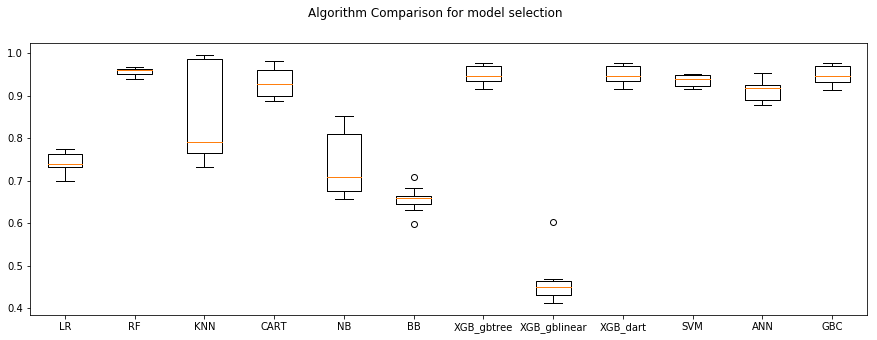

In [79]:
# boxplot KFold using 10 splits - Algorithm comparison
rcParams['figure.figsize'] =15,5
# Put figure title
fig = plt.figure()
fig.suptitle('Algorithm Comparison for model selection')
ax = fig.add_subplot(111)
# draw plot
plt.boxplot(results)
# label in X axis
ax.set_xticklabels(names)
# Show the plot
plt.show()

#### For this particular case Random Forest gives best accuracy score as compared to other algorithms

### Considering Random Forest Algorithm for further modelling and optimization